In [ ]:
# !pip install tweepy

In [16]:
import tweepy
import csv
import pandas as pd
import os
os.chdir("C:\\Users\\thoma\\Documents\\UIC\\Courses\\IDS 566 Advanced Text Analytics\\Project")

In [17]:
####input your credentials here
consumer_key = 'Ede00bVTvOPzkWfiiDOKDUIfZ'
consumer_secret = 'KxPFsGT1LrORHpDvT5EceQ1rNZAgCBef9VUiuvqSxIZd8CRCJv'
access_token = '996750875270893569-V5PhtklmDCXW90D2JJ61QjahlaEob09'
access_token_secret = 'SZhchAGRgoig6h0b31OgmXLpV4K8zVn2ojmjeIxjeBEwf'

In [18]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [19]:
tweets = tweepy.Cursor(api.search,q="#JokerMovie"+" -filter:retweets",count=1000,
                           lang="en",
                           since="2019-10-04",
                      tweet_mode="extended").items()


In [20]:
tmp=[]  

tweets_text = [tweet.full_text for tweet in tweets] 
for j in tweets_text: 
    tmp.append(j) 

In [12]:
type(tweets)

tweepy.cursor.ItemIterator

In [14]:
list(tweets)

[]

In [85]:
type(tmp)
print(len(tmp))

410


In [86]:
tmp

['Feeling joker #JokerMovie https://t.co/DSVsF42DML',
 "@AGramuglia I saw #BirdsOfPrey and #JokerMovie and if I had to choose the better movie it would easily be #BOP.I know I'm in the minority but I was disappointed in #Joker. Not sure why everyone has gone crazy for it. To me it was ok but I expected so much better.",
 'Mother F***ers reference the #JokerMovie in a Hispanic comedy show 😫 https://t.co/iDFfdjgOva',
 'I’m Joaquin off to HER 😔😔 #incel #jokermovie',
 'Hmm, my new manicure with Joker colors💕 \n#joker #Joker #JokerMovie #manicure #JoaquinPhoenix https://t.co/7UDVvYvo2Y',
 '@dc_uhd ❤️💜❤️💜 Beautiful. #JokerMovie',
 'Just watched Joker - Joaquin Phoenix is astonishing, unbelievably dark, intense and frightened the life out of me! #JokerMovie',
 'I lost track of time on how long this took me. Enjoy anyways.\n\n#SonictheHedgehog #JokerMovie #SonicMovie https://t.co/pmOs9GgFxw',
 '#JokerMovie \n\nYou convinced me, \u2066@ARonHubbardBM\u2069 \nhttps://t.co/i2PfbPlEvs\n\nI’m going 

In [87]:
type(tmp[1])

str

In [88]:
## Removing Emojis

In [20]:
!pip install emoji

  Stored in directory: C:\Users\thoma\AppData\Local\pip\Cache\wheels\2a\a9\0a\4f8e8cce8074232aba240caca3fade315bb49fac68808d1a9c
Successfully built emoji


In [21]:
import emoji
def give_emoji_free_text(text):
    allchars = [str for str in text.decode('utf-8')]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in text.decode('utf-8').split() if not any(i in str for i in emoji_list)])
    return clean_text

In [ ]:
# Generating a Wordcloud

In [22]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
additional_words = ['movie', 'joker', 'jokermovie', 'grossing',"batman","thejoker",
                    "joaquin","phoenix", "joaquinphoenix","dc","dccomics"]
stopwords2 = list(STOPWORDS) + additional_words
stopwords2

['some',
 "what's",
 'into',
 'should',
 "they're",
 'also',
 'him',
 'off',
 "you've",
 "let's",
 'itself',
 'them',
 "they'll",
 'shall',
 'before',
 'not',
 'however',
 'but',
 'it',
 'ever',
 "couldn't",
 'against',
 'i',
 "he'd",
 'yourself',
 'about',
 "aren't",
 "she'll",
 'such',
 "i've",
 "mustn't",
 'while',
 "we'd",
 'further',
 "shouldn't",
 'that',
 "won't",
 "that's",
 'com',
 "he'll",
 "wouldn't",
 'with',
 'been',
 "they've",
 'k',
 "hadn't",
 'other',
 'your',
 'since',
 'would',
 "isn't",
 "haven't",
 'r',
 'ought',
 "who's",
 "when's",
 'me',
 "weren't",
 'those',
 'http',
 'do',
 'on',
 'very',
 'yours',
 'herself',
 "how's",
 'our',
 'after',
 'does',
 "she'd",
 'between',
 'during',
 'more',
 'myself',
 'doing',
 'where',
 'no',
 'out',
 'get',
 'did',
 'www',
 "i'll",
 'until',
 'under',
 'is',
 'of',
 'only',
 "we've",
 "don't",
 "didn't",
 "i'm",
 "why's",
 "we'll",
 'up',
 'have',
 'ourselves',
 'hence',
 'am',
 'has',
 'my',
 'having',
 'few',
 'then',
 'this

In [ ]:
# Cleaning the Text

In [23]:
import re

punct_text = '!#"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
emoji_free = []
from nltk.corpus import stopwords 

for i in tmp:
    text1 = give_emoji_free_text(i.encode('utf-8'))
    ## removing user handles
    text2 = re.sub('RT @[^\s]+','',text1)
    text3 = ''.join(c for c in text2 if c not in (punct_text))
    text4 = ''.join(c for c in text3 if not c.isdigit())
    text5 = text4.lower()
    text6 = ' '.join([word for word in text5.split() if word not in stopwords2])    
    emoji_free.append(text6)
    

In [308]:
type(emoji_free)

list

In [323]:
emoji_free

['feeling httpstcodsvsfdml',
 'agramuglia saw birdsofprey choose better easily bopi know im minority disappointed sure everyone gone crazy ok expected much better',
 'mother fers reference hispanic comedy show httpstcoidffdjgova',
 'i’m incel',
 'hmm new manicure manicure httpstcoudvvyvoy',
 'dcuhd beautiful',
 'watched astonishing unbelievably dark intense frightened life',
 'lost track time long took enjoy anyways sonicthehedgehog sonicmovie httpstcopmosggfxw',
 'convinced \u2066aronhubbardbm\u2069 httpstcoipfbplevs i’m going see soon httpstcoypnfp httpstcoqqnpgjmw',
 'invisibleman amazing film rival best origin story',
 'man miss hype',
 'ok dont want sissy art mancave something bat image even girlfriend will think cool httpstcolkycewhiy jokerfilm gotham art bat poster httpstcowncyhnsob',
 'happens shoot idol jokerfanart httpstcofcinewdur',
 'lot discussions youre fence whether see read thoughts expect consider httpstcoizsszk movies intheaters nowshowing warnerbros',
 'lovely charac

In [47]:
!pip install wordcloud

In [24]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords2,
        max_words=200,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


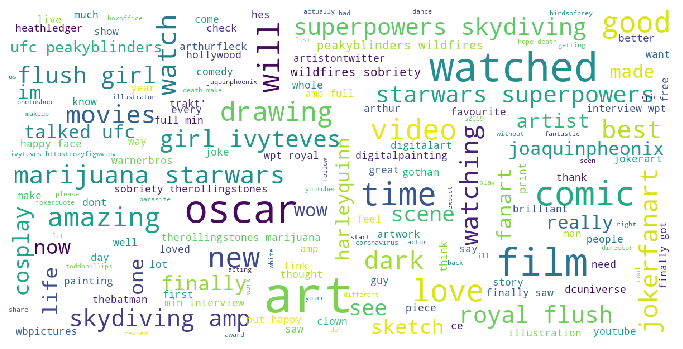

In [25]:
show_wordcloud(emoji_free)

In [12]:
!pip install vaderSentiment

In [26]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [27]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [28]:
tweet_frame = pd.DataFrame(emoji_free, columns = ['tweets'])
tweet_frame.head()

,tweets
0,pretty good film earthshatteringly great good ...
1,im watching httpstcodmtaxeogqd trakt
2,swordartonline became httpstconxfhhcqt
3,will say fantastic cinematography beautifully ...
4,joegatto waiting start now


In [50]:
tweet_frame.to_csv("C:/Users/thoma/Documents/UIC/Courses/IDS 566 Advanced Text Analytics/Project/tweets_frame.csv",
                  index = False)

In [29]:
tweets_frame2 = pd.DataFrame([])

for i in range(0,len(emoji_free)):
    somedict = analyser.polarity_scores(emoji_free[i])
#     print(somedict)
    tmp_pos = somedict['pos']
    tmp_neg = somedict['neg']
    tmp_neu = somedict['neu']
    tmp_comp = somedict['compound']
    
    tweets_frame2 = tweets_frame2.append(pd.DataFrame({'tweet':emoji_free[i],'pos': tmp_pos, 'neg': tmp_neg,
                                    'neu': tmp_neu, 'compound': tmp_comp}, index =[0]), ignore_index=True)
    

In [30]:
tweets_frame2.head()

,tweet,pos,neg,neu,compound
0,pretty good film earthshatteringly great good ...,0.611,0.095,0.294,0.9712
1,im watching httpstcodmtaxeogqd trakt,0.000,0.000,1.000,0.0000
2,swordartonline became httpstconxfhhcqt,0.000,0.000,1.000,0.0000
3,will say fantastic cinematography beautifully ...,0.561,0.000,0.439,0.9100
4,joegatto waiting start now,0.000,0.000,1.000,0.0000


In [292]:
tweets_frame2.dtypes

tweet        object
pos         float64
neg         float64
neu         float64
compound    float64
dtype: object

In [ ]:
# Plot for Compound Scores

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

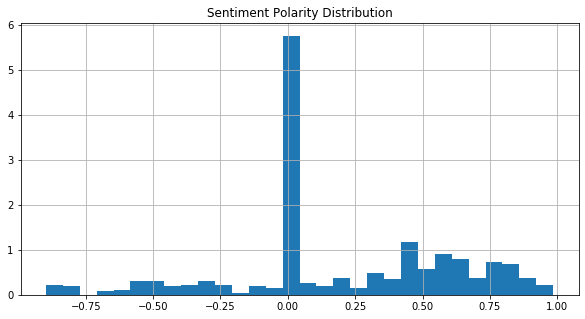

In [31]:
import matplotlib.pyplot as plt

f = tweets_frame2['compound'].hist(bins = 30, figsize = (10,5), density = True)
f.set_title("Sentiment Polarity Distribution")

In [ ]:
## Extracting Sentiments based on the Compound Score

In [32]:
def extract_sent(row):
    if row['compound'] <0.0:
        val = "negative"
    elif row['compound'] > 0.0:
        val = "positive"
    else:
        val = "neutral"
    return val

In [33]:
tweets_frame2['Sent'] = tweets_frame2.apply(extract_sent, axis=1)

In [34]:
type(tweets_frame2['Sent'].value_counts())
sent_values = pd.DataFrame(tweets_frame2['Sent'].value_counts().rename_axis('Sentiment').reset_index())
sent_values

,Sentiment,Sent
0,positive,207
1,neutral,147
2,negative,67


In [ ]:
# Plotting the frequency count of each type of tweet

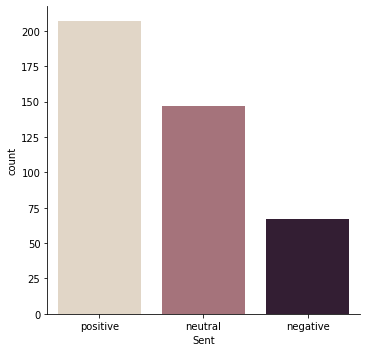

In [35]:
import seaborn as sns

sns.catplot(x="Sent", kind="count", palette="ch:.25", data=tweets_frame2);

In [161]:
tweets_frame2.columns

Index(['tweet', 'pos', 'neg', 'neu', 'compound', 'Sent'], dtype='object')

In [335]:
tweets_frame2['Sent'].value_counts()

positive    201
neutral     142
negative     67
Name: Sent, dtype: int64

In [36]:
## Subsetting sentiment tweets

positive_tweets = tweets_frame2[tweets_frame2.Sent == "positive"]
negative_tweets = tweets_frame2[tweets_frame2.Sent == "negative"]
neutral_tweets = tweets_frame2[tweets_frame2.Sent == "neutral"]

In [159]:
positive_tweets.columns

Index(['tweet', 'pos', 'neg', 'neu', 'compound', 'Sent'], dtype='object')

In [37]:
from collections import Counter
pos_word_count = pd.DataFrame(Counter(" ".join(positive_tweets["tweet"]).split()).most_common(20),
                             columns = ['word','count'])
pos_word_count

neg_word_count = pd.DataFrame(Counter(" ".join(negative_tweets["tweet"]).split()).most_common(20),
                             columns = ['word','count'])

neut_word_count = pd.DataFrame(Counter(" ".join(neutral_tweets["tweet"]).split()).most_common(20),
                             columns = ['word','count'])


In [171]:
!pip install bokeh

In [38]:
from bokeh.plotting import figure, show
from bokeh.palettes import Pastel2
from bokeh.transform import factor_cmap
from bokeh.models import ColumnDataSource
from bokeh.palettes import Category20
import itertools
from bokeh.io import output_notebook
output_notebook()



Loading BokehJS ...

In [ ]:
## For Positive Tweets

In [39]:
words = pos_word_count['word']

source = ColumnDataSource(data=dict(word=pos_word_count['word'], count=pos_word_count['count']))

p = figure(x_range = pos_word_count['word'],plot_height=400, plot_width = 800,
          title = "Top 20 Frequent words among Positive Tweets")
p.vbar(x='word', top='count', source = source, 
       width=0.9, line_color="grey",
       fill_color = factor_cmap('word', palette=Category20[20], factors = words.unique())
      )
p.title.text_color = "Navy"
p.title.text_font = "times"
p.title.text_font_style = "italic"
p.title.text_font_size = "20pt"

p.xaxis.major_label_orientation = 1
p.outline_line_color = "black"

# p.xgrid.grid_line_color = "black"
# p.title.text_alpha = 'middle'

show(p)

In [339]:
# For Negative Tweets

In [340]:
words = neg_word_count['word']

source = ColumnDataSource(data=dict(word=neg_word_count['word'], count=neg_word_count['count']))

p = figure(x_range = neg_word_count['word'],plot_height=400, plot_width = 800,
          title = "Top 20 Frequent words among Negative Tweets")
p.vbar(x='word', top='count', source = source, 
       width=0.9, line_color="grey",
       fill_color = factor_cmap('word', palette=Category20[20], factors = words.unique())
      )
p.title.text_color = "Navy"
p.title.text_font = "times"
p.title.text_font_style = "italic"
p.title.text_font_size = "20pt"

p.xaxis.major_label_orientation = 1
p.outline_line_color = "black"

# p.xgrid.grid_line_color = "black"
# p.title.text_alpha = 'middle'

show(p)

In [341]:
# For Neutral Tweets

In [40]:
words = neut_word_count['word']

source = ColumnDataSource(data=dict(word=neut_word_count['word'], count=neut_word_count['count']))

p = figure(x_range = neut_word_count['word'],plot_height=400, plot_width = 800,
          title = "Top 20 Frequent words among Neutral Tweets")
p.vbar(x='word', top='count', source = source, 
       width=0.9, line_color="grey",
       fill_color = factor_cmap('word', palette=Category20[20], factors = words.unique())
      )
p.title.text_color = "Navy"
p.title.text_font = "times"
p.title.text_font_style = "italic"
p.title.text_font_size = "20pt"

p.xaxis.major_label_orientation = 1
p.outline_line_color = "black"

# p.xgrid.grid_line_color = "black"
# p.title.text_alpha = 'middle'

show(p)